In [31]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns



In [32]:
file_path = "C:/Users/Josiah/Downloads/books.v3.2.dropped_columns (1).xlsx"

In [33]:
df = pd.read_excel(file_path)

In [34]:
df.head(10)

,bookID,authors,average_rating,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher
0,12224,Sam Bass Warner,3.58,9780674842113,en-US,236,61,6,38097,Harvard University Press
1,16914,David E. Smith (Turgon of TheOneRing.net,3.58,9781593600112,eng,400,26,4,38083,Cold Spring Press
2,26012,Bret Easton Ellis,3.46,9782264031914,fre,537,56,5,36937,2018-10-01 00:00:00
3,28225,Nicholson Baker,3.84,9782264017697,fre,191,6,1,36117,2018-10-01 00:00:00
4,22128,James Wesley,3.63,9781563841552,eng,342,38,4,36175,Huntington House Publishers
5,31095,Robert M. Pirsig,3.58,9781403356208,en-GB,600,54,5,37635,1st Book Library
6,5478,George Orwell,4.18,9781421808321,eng,387,215,17,38534,1st World Library
7,31373,Elizabeth George,4.10,9780553575101,eng,718,10608,295,36831,Bantam Books
8,16285,Terry Deary,4.40,9780713659894,eng,62,5,0,37195,A & C Black
9,18843,Virginia Woolf,4.07,9780156028066,eng,216,244,13,37711,A Harvest Book


In [35]:
# Displaying basic information
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   bookID              11127 non-null  int64  
 1   authors             11127 non-null  object 
 2   average_rating      11127 non-null  float64
 3   isbn13              11127 non-null  int64  
 4   language_code       11127 non-null  object 
 5     num_pages         11127 non-null  int64  
 6   ratings_count       11127 non-null  int64  
 7   text_reviews_count  11127 non-null  int64  
 8   publication_date    11127 non-null  int64  
 9   publisher           11127 non-null  object 
dtypes: float64(1), int64(6), object(3)
memory usage: 869.4+ KB


,bookID,average_rating,isbn13,num_pages,ratings_count,text_reviews_count,publication_date
count,11127.000000,11127.000000,1.112700e+04,11127.000000,1.112700e+04,11127.000000,11127.000000
mean,21310.938887,3.933631,9.759888e+12,336.376921,1.793641e+04,541.854498,36768.842995
std,13093.358023,0.352445,4.428964e+11,241.127305,1.124794e+05,2576.176608,2998.495083
min,1.000000,0.000000,8.987060e+09,0.000000,0.000000e+00,0.000000,4750.000000
25%,10287.000000,3.770000,9.780345e+12,192.000000,1.040000e+02,9.000000,35992.500000
50%,20287.000000,3.960000,9.780586e+12,299.000000,7.450000e+02,46.000000,37681.000000
75%,32104.500000,4.135000,9.780873e+12,416.000000,4.993500e+03,237.500000,38625.000000
max,45641.000000,5.000000,9.790008e+12,6576.000000,4.597666e+06,94265.000000,43921.000000


In [36]:
df.isna().sum()

bookID                0
authors               0
average_rating        0
isbn13                0
language_code         0
  num_pages           0
ratings_count         0
text_reviews_count    0
publication_date      0
publisher             0
dtype: int64

In [37]:
df = df.drop(columns="bookID")

In [38]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [39]:
import category_encoders as ce

# Create a binary encoder object
encoder = ce.BinaryEncoder(cols=['authors'])

# Fit and transform the 'language_code' column
df = encoder.fit_transform(df)


print(df.head())

   authors_0  authors_1  authors_2  authors_3  authors_4  authors_5  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   authors_6  authors_7  authors_8  authors_9  ...  authors_11  authors_12  \
0          0          0          0          0  ...           0           1   
1          0          0          0          0  ...           1           0   
2          0          0          0          0  ...           1           1   
3          0          0          0          0  ...           0           0   
4          0          0          0          0  ...           0           1   

   average_rating         isbn13  language_code   num_pages  ratings_count  \
0            3.58  9780674

In [40]:
import category_encoders as ce

# Create a binary encoder object
encoder = ce.BinaryEncoder(cols=['publisher'])

# Fit and transform the 'language_code' column
df = encoder.fit_transform(df)


print(df.head())

   authors_0  authors_1  authors_2  authors_3  authors_4  authors_5  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   authors_6  authors_7  authors_8  authors_9  ...  publisher_1  publisher_2  \
0          0          0          0          0  ...            0            0   
1          0          0          0          0  ...            0            0   
2          0          0          0          0  ...            0            0   
3          0          0          0          0  ...            0            0   
4          0          0          0          0  ...            0            0   

   publisher_3  publisher_4  publisher_5 publisher_6  publisher_7  \
0            0         

In [41]:
import category_encoders as ce

# Create a binary encoder object
encoder = ce.BinaryEncoder(cols=['language_code'])

# Fit and transform the 'language_code' column
df = encoder.fit_transform(df)


print(df.head())

   authors_0  authors_1  authors_2  authors_3  authors_4  authors_5  \
0          0          0          0          0          0          0   
1          0          0          0          0          0          0   
2          0          0          0          0          0          0   
3          0          0          0          0          0          0   
4          0          0          0          0          0          0   

   authors_6  authors_7  authors_8  authors_9  ...  publisher_1  publisher_2  \
0          0          0          0          0  ...            0            0   
1          0          0          0          0  ...            0            0   
2          0          0          0          0  ...            0            0   
3          0          0          0          0  ...            0            0   
4          0          0          0          0  ...            0            0   

   publisher_3  publisher_4  publisher_5  publisher_6  publisher_7  \
0            0        

In [43]:
print (df_processed.columns)

Index(['authors_0', 'authors_1', 'authors_2', 'authors_3', 'authors_4',
       'authors_5', 'authors_6', 'authors_7', 'authors_8', 'authors_9',
       'authors_10', 'authors_11', 'authors_12', 'average_rating', 'isbn13',
       '  num_pages', 'ratings_count', 'text_reviews_count',
       'publication_date', 'publisher_0', 'publisher_1', 'publisher_2',
       'publisher_3', 'publisher_4', 'publisher_5', 'publisher_6',
       'publisher_7', 'publisher_8', 'publisher_9', 'publisher_10',
       'Language_Label'],
      dtype='object')


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11127 entries, 0 to 11126
Data columns (total 35 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   authors_0           11127 non-null  int64  
 1   authors_1           11127 non-null  int64  
 2   authors_2           11127 non-null  int64  
 3   authors_3           11127 non-null  int64  
 4   authors_4           11127 non-null  int64  
 5   authors_5           11127 non-null  int64  
 6   authors_6           11127 non-null  int64  
 7   authors_7           11127 non-null  int64  
 8   authors_8           11127 non-null  int64  
 9   authors_9           11127 non-null  int64  
 10  authors_10          11127 non-null  int64  
 11  authors_11          11127 non-null  int64  
 12  authors_12          11127 non-null  int64  
 13  average_rating      11127 non-null  float64
 14  isbn13              11127 non-null  int64  
 15  language_code_0     11127 non-null  int64  
 16  lang

In [45]:
# Standarding the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

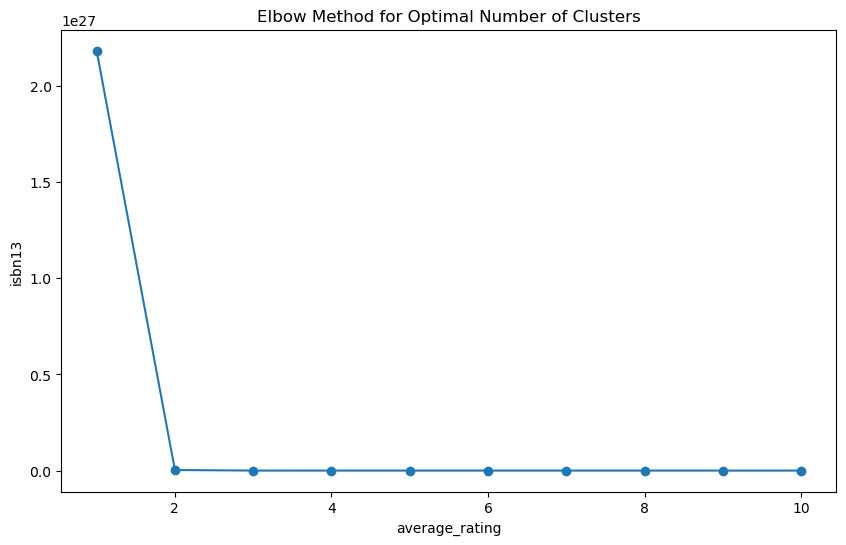

In [46]:
# Calculating WCSS for different numbers of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('average_rating')
plt.ylabel('isbn13')
plt.show()


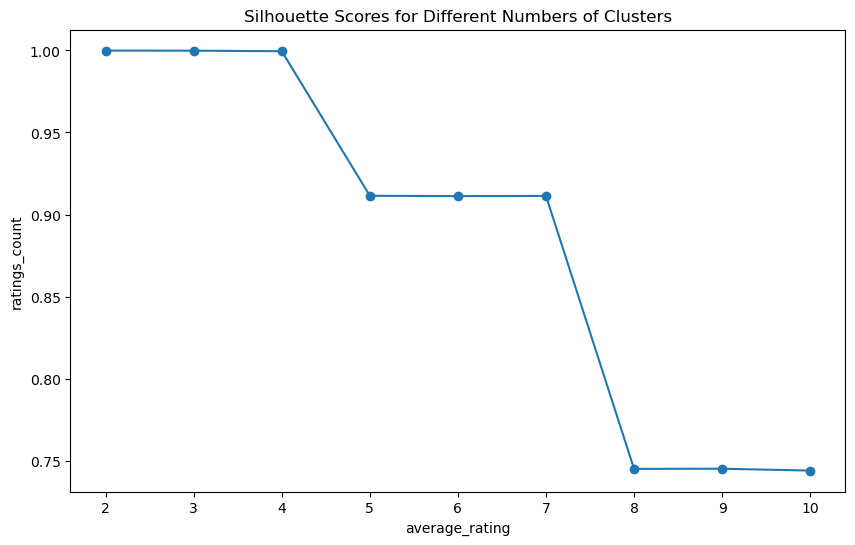

In [47]:
# Calculating silhouette scores for different numbers of clusters
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    labels = kmeans.fit_predict(df)
    silhouette_scores.append(silhouette_score(df, labels))

# Plotting the Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('average_rating')
plt.ylabel('ratings_count')
plt.show()


In [54]:
# Fitting KMeans with the chosen number of clusters
n_clusters = 3  # Example: choose based on the above analysis
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters = kmeans.fit_predict(df)

# Adding cluster labels to the original DataFrame
df['Cluster'] = clusters


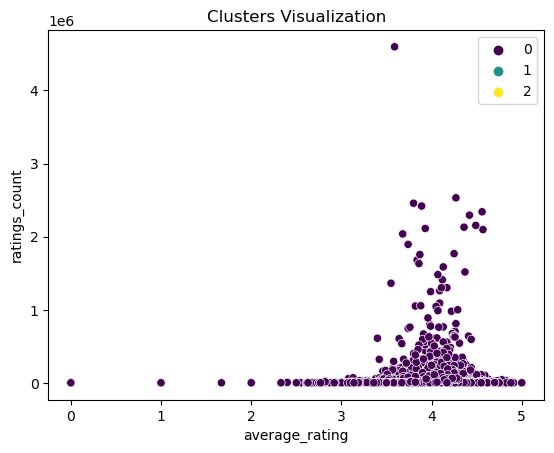

In [55]:
sns.scatterplot(x=df['average_rating'], y=df['ratings_count'], hue=clusters, palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('average_rating')
plt.ylabel('ratings_count')
plt.show()

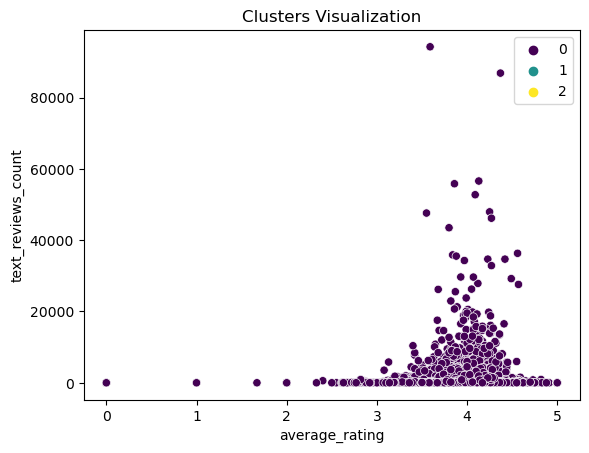

In [56]:
sns.scatterplot(x=df['average_rating'], y=df['text_reviews_count'], hue=clusters, palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('average_rating')
plt.ylabel('text_reviews_count')
plt.show()

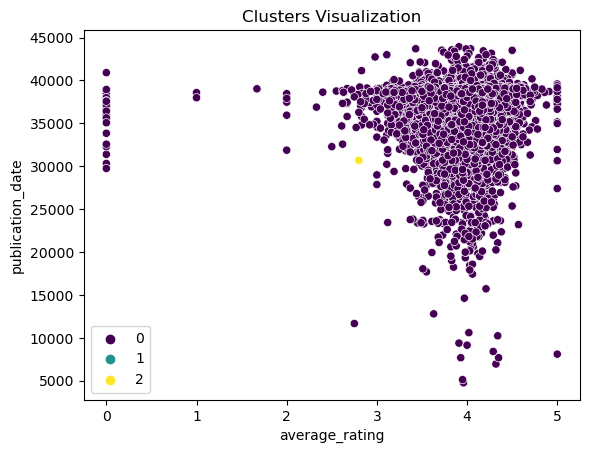

In [57]:
sns.scatterplot(x=df['average_rating'], y=df['publication_date'], hue=clusters, palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('average_rating')
plt.ylabel('publication_date')
plt.show()

In [60]:
sns.scatterplot(x=df['average_rating'], y=df[' num_pages'], hue=clusters, palette='viridis')
plt.title('Clusters Visualization')
plt.xlabel('average_rating')
plt.ylabel(' num_page')
plt.show()

KeyError: ' num_pages'

In [61]:
df.columns

Index(['authors_0', 'authors_1', 'authors_2', 'authors_3', 'authors_4',
       'authors_5', 'authors_6', 'authors_7', 'authors_8', 'authors_9',
       'authors_10', 'authors_11', 'authors_12', 'average_rating', 'isbn13',
       'language_code_0', 'language_code_1', 'language_code_2',
       'language_code_3', 'language_code_4', '  num_pages', 'ratings_count',
       'text_reviews_count', 'publication_date', 'publisher_0', 'publisher_1',
       'publisher_2', 'publisher_3', 'publisher_4', 'publisher_5',
       'publisher_6', 'publisher_7', 'publisher_8', 'publisher_9',
       'publisher_10', 'Cluster'],
      dtype='object')

# Methodoloy 1: 

1. Preprocessing: Data was standardized to ensure all features contribute equally to the clustering process. 

2. Choosing Number of Clusters:


- Elbow Method: The plot helps identify a point where adding more clusters yields little improvement in WCSS. This is a good heuristic to choose the number of clusters.
- Silhouette Score: Measures how similar an object is to its own cluster compared to other clusters. Higher scores indicate better-defined clusters.


3. Clustering: K-Means was used to partition the data into the chosen number of clusters. Each user is assigned to a cluster based on similarity in feature space.


4. Cluster Analysis: Cluster centers provide the average feature values for users in each cluster. This helps in understanding the typical profile of users in each cluster.

5. Visualization: Scatter plots help in understanding how clusters are distributed and separated in feature space.

6. The chosen number of clusters (5) provides a balance between granularity and interpretability.

7. Profiles of clusters help in identifying distinct user segments based on their characteristics.


In [65]:
# List of features used for clustering (excluding 'Cluster')
features_for_clustering = ['authors_0', 'authors_1', 'authors_2', 'authors_3', 'authors_4',
       'authors_5', 'authors_6', 'authors_7', 'authors_8', 'authors_9',
       'authors_10', 'authors_11', 'authors_12', 'average_rating', 'isbn13',
       'language_code_0', 'language_code_1', 'language_code_2',
       'language_code_3', 'language_code_4', '  num_pages', 'ratings_count',
       'text_reviews_count', 'publication_date', 'publisher_0', 'publisher_1',
       'publisher_2', 'publisher_3', 'publisher_4', 'publisher_5',
       'publisher_6', 'publisher_7', 'publisher_8', 'publisher_9',
       'publisher_10', 'Cluster']

# Scaling the data using the correct features (exclude 'Cluster')
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[features_for_clustering])

# Fitting the KMeans model on the scaled data
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)


C:\Users\Josiah\anaconda3\Newanaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [66]:
# Performing inverse transform on the cluster centers
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)

# Creating a DataFrame for cluster profiles
cluster_profiles = pd.DataFrame(cluster_centers, columns=features_for_clustering)
print(cluster_profiles)


      authors_0  authors_1  authors_2  authors_3  authors_4  authors_5  \
0  1.771015e-02   0.000249   0.357196   0.444001   0.444126   0.439761   
1 -2.706169e-16   1.000000   0.427043   0.463035   0.516537   0.492218   
2 -1.734723e-18   0.360000   0.560000   0.320000   0.520000   0.320000   

   authors_6  authors_7  authors_8  authors_9  ...  publisher_2  publisher_3  \
0   0.490397   0.498129   0.521951   0.526939  ...     0.340359     0.616613   
1   0.502270   0.494163   0.507134   0.513619  ...     0.431258     0.585279   
2   0.400000   0.320000   0.440000   0.400000  ...     0.560000     0.400000   

   publisher_4  publisher_5  publisher_6  publisher_7  publisher_8  \
0     0.426041     0.401596     0.535171     0.522075     0.519207   
1     0.484112     0.404994     0.494488     0.587224     0.557393   
2     0.440000     0.400000     0.480000     0.440000     0.480000   

   publisher_9  publisher_10       Cluster  
0     0.516962      0.527189  1.687019e-16  
1     0.523

In [67]:
from sklearn.preprocessing import StandardScaler

# Exclude 'Cluster' column from scaling if needed
df_numeric = df.drop(columns=['Cluster'])  # Assuming 'df' is your dataframe

# Apply StandardScaler
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

# Convert back to DataFrame if you want to work with it more easily
df_scaled = pd.DataFrame(df_scaled, columns=df_numeric.columns)

# Optionally, add back the 'Cluster' column if needed
df_scaled['Cluster'] = df['Cluster'].values


# Result 1 interpretation

Based on the chosen qualities, each row represents a cluster center and provides information about the "average" attributes of users in that cluster. These cluster profiles provide information about user segmentation.

 ***Conclusion:

The clusters provide a useful segmentation of users based on various financial and activity-related metrics:

High loan score, long tenure, high airtime: financially stable and active users.
Moderate loan scores, new users: decent activity but shorter histories.
Very high loan score, newer users: potential high-value customers but still early in their financial lifecycle.
Higher creditworthiness: high bureau score and longer tenures with average-to-high usage and savings.
These insights could be used to tailor marketing, financial products, or user engagement strategies depending on the specific profile of each cluster.




In [68]:
pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


# Methodology 2: Using neural approach for Clustering

1. Autoencoder for Dimensionality Reduction:

- An autoencoder is a type of neural network used to learn a compressed representation of data. It consists of two parts: the encoder, which compresses the input data, and the decoder, which attempts to reconstruct the original data from the compressed version.
- The compressed (bottleneck) representation learned by the autoencoder can capture the important features of the data, making it useful for clustering.

2. K-means Clustering on Encoded Features:

- After training the autoencoder, we can extract the latent space representations (the bottleneck layer).
- Then, we apply K-means clustering on these learned representations to group the data points into clusters.

Epoch 1/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - loss: 1.1742 - val_loss: 1.0924
Epoch 2/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9725 - val_loss: 1.0433
Epoch 3/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9596 - val_loss: 1.0205
Epoch 4/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9262 - val_loss: 1.0077
Epoch 5/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9443 - val_loss: 0.9993
Epoch 6/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8662 - val_loss: 0.9933
Epoch 7/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.8710 - val_loss: 0.9882
Epoch 8/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8367 - val_loss: 0.9836
Epoch 9/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8760 - val_loss: 0.9798
Epoch 10/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.8476 - val_loss: 0.9763
Epoch 11/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.8560 - val_loss: 0.9731
Epoch 12/50
279/279 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/ste

C:\Users\Josiah\anaconda3\Newanaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


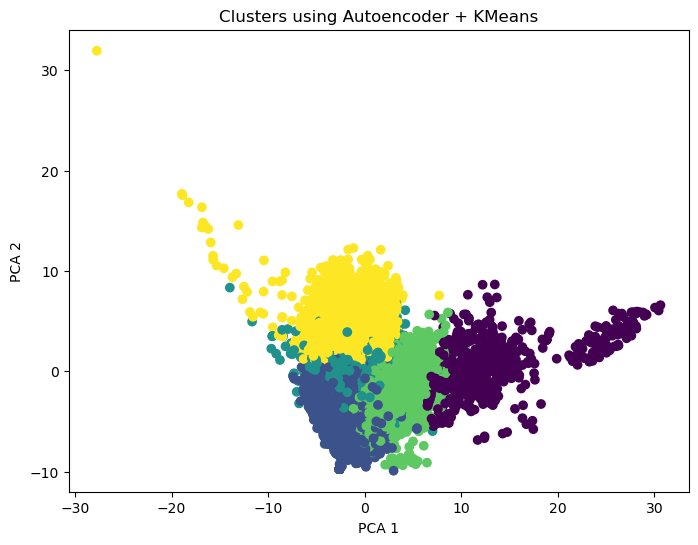

In [69]:
from tensorflow.keras import layers, models
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt




# Assuming df is your input data (without labels)
df_scaled = StandardScaler().fit_transform(df)

# Autoencoder Architecture
input_dim = df_scaled.shape[1]
encoding_dim = 6  # You can adjust this depending on the dimensionality reduction you want

input_layer = layers.Input(shape=(input_dim,))
encoder = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoder = layers.Dense(input_dim, activation='sigmoid')(encoder)

autoencoder = models.Model(inputs=input_layer, outputs=decoder)
autoencoder.compile(optimizer='adam', loss='mse')

# Traininig the Autoencoder
history = autoencoder.fit(df_scaled, df_scaled, epochs=50, batch_size=32, shuffle=True, validation_split=0.2)

# Extracting the Encoder model to get the compressed representations
encoder_model = models.Model(inputs=input_layer, outputs=encoder)

# Getting the compressed latent representations (bottleneck features)
encoded_data = encoder_model.predict(df_scaled)

# K-means on encoded features
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(encoded_data)

# Adding the cluster labels to the original dataframe
df['Cluster'] = clusters

# Analysing cluster centers based on the original features
cluster_centers = kmeans.cluster_centers_
decoded_centers = autoencoder.layers[-1](cluster_centers).numpy()

scaler = StandardScaler()

# Fitfing the scaler on the relevant data 
scaler.fit(df.values[:, :-1])  # Fit excluding the cluster column


# Ensuring that decoded_centers only includes the features (exclude cluster labels)
decoded_centers = decoded_centers[:, :-1]  # Exclude the cluster column from decoded_centers



# Now applying inverse_transform on the decoded_centers
cluster_profiles = pd.DataFrame(scaler.inverse_transform(decoded_centers), columns=df.columns[:-1])  # Excluding the Cluster column




# Visualizing Clusters using PCA 
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(encoded_data)
plt.figure(figsize=(8,6))
plt.scatter(pca_data[:,0], pca_data[:,1], c=clusters, cmap='viridis')
plt.title("Clusters using Autoencoder + KMeans")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

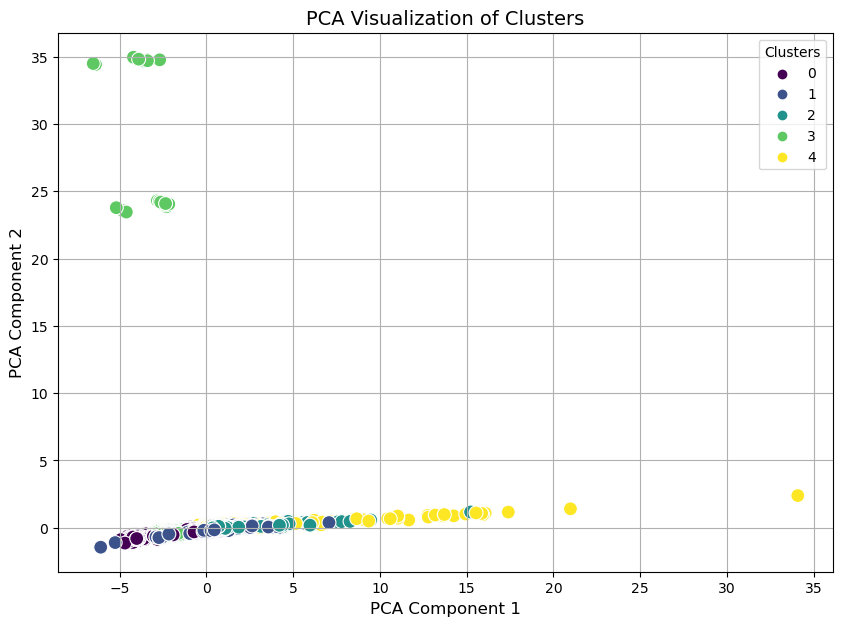

In [71]:
#Visualizing the Clusters


encoded_data = df_scaled 

# Performing PCA to reduce the data to 2 dimensions for visualization
df_reduced = pca.fit_transform(encoded_data)  # Reducing to 2D for visualization

# Creating a scatter plot of the reduced data with clusters color-coded
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df_reduced[:, 0], y=df_reduced[:, 1], hue=clusters, palette='viridis', s=100)
plt.title('PCA Visualization of Clusters', fontsize=14)
plt.xlabel('PCA Component 1', fontsize=12)
plt.ylabel('PCA Component 2', fontsize=12)
plt.legend(title='Clusters')
plt.grid(True)
plt.show()